# Librerias

In [1]:
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")
for device in tf.config.list_physical_devices('GPU'):
    print(device)

2024-11-10 15:19:32.096757: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 15:19:32.096781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 15:19:32.105299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 15:19:32.125670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2024-11-10 15:19:34.262674: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:19:34.384047: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:19:34.390608: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
import keras
from keras.utils import to_categorical
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos

In [4]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

Sesenta mil imagenes a color de 32x32

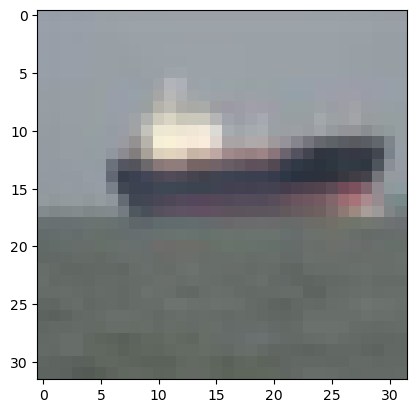

In [8]:
plt.imshow(X_train[69])

In [9]:
X_train.astype('float32')/255
X_test.astype('float32')/255

num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)
num_clases

10

Clasificacion de 10 distintas clases

In [10]:
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [11]:
print("train", X_train.shape[0])
print("valid", X_valid.shape[0])
print("test", X_test.shape[0])

train 45000
valid 5000
test 10000


# Creacion de la red neuronal

In [12]:
base_de_filtros = 32
w_regularizer = 2e-5

In [13]:
# Crear el modelo
model = Sequential()

# Añadir la primera capa convolucional
model.add(Conv2D(base_de_filtros, kernel_size=(3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Añadir la segunda capa convolucional
model.add(Conv2D(base_de_filtros*2, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Añadir la tercera capa convolucional
model.add(Conv2D(base_de_filtros*4, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l1(w_regularizer)))
model.add(Activation('relu'))
model.add(Dropout(0.15))

# Añadir la cuarta capa convolucional
model.add(Conv2D(base_de_filtros*4, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l1(w_regularizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

# Añadir la capa de flatten
model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

2024-11-10 15:19:35.382747: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:19:35.389444: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:19:35.394842: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Entrenamiento

In [14]:
#hist = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_valid, y_valid), verbose=2, shuffle=True)

vrga

In [15]:
#plt.plot(hist.history['accuracy'], label='accuracy')
#plt.plot(hist.history['val_accuracy'], label='val_accuracy')
#plt.legend()
#plt.plot()

In [16]:
#model.evaluate(X_test, y_test)

# Optimizando esta cosa

In [17]:
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")
for device in tf.config.list_physical_devices('GPU'):
    print(device)

import keras
from keras.utils import to_categorical
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
l = len(np.unique(y_train))
y_train = to_categorical(y_train, l)
y_test = to_categorical(y_test, l)

In [20]:
mean = np.mean(X_train)
std = np.std(X_train)

In [21]:
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [22]:
# Crear el modelo
model = Sequential()

# Añadir la primera capa convolucional
model.add(Conv2D(base_de_filtros, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l1(w_regularizer), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Añadir la segunda capa convolucional
model.add(Conv2D(base_de_filtros*2, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Añadir la tercera capa convolucional
model.add(Conv2D(base_de_filtros*4, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l1(w_regularizer)))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())

# Añadir la cuarta capa convolucional
model.add(Conv2D(base_de_filtros*4, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l1(w_regularizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())

# Añadir la capa de flatten
model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                 

In [23]:
image_gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [25]:
mejor = ModelCheckpoint('godin.weights.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [26]:
hist = model.fit(image_gen.flow(X_train, y_train, batch_size=128), callbacks=[mejor], steps_per_epoch=X_train.shape[0]//128, epochs=120, verbose=2, validation_data=(X_test, y_test))

Epoch 1/120


2024-11-10 15:19:37.439654: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-11-10 15:19:37.610517: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-11-10 15:19:38.721717: I external/local_xla/xla/service/service.cc:168] XLA service 0x7534a41224b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-10 15:19:38.721745: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-11-10 15:19:38.725687: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731269978.790986    8441 device_compiler.h:186] Compiled c


Epoch 1: val_accuracy improved from -inf to 0.57080, saving model to godin.weights.h5
390/390 - 17s - loss: 1.8197 - accuracy: 0.4576 - val_loss: 1.3992 - val_accuracy: 0.5708 - 17s/epoch - 45ms/step
Epoch 2/120

Epoch 2: val_accuracy improved from 0.57080 to 0.64970, saving model to godin.weights.h5
390/390 - 12s - loss: 1.3569 - accuracy: 0.5899 - val_loss: 1.2413 - val_accuracy: 0.6497 - 12s/epoch - 30ms/step
Epoch 3/120

Epoch 3: val_accuracy improved from 0.64970 to 0.70480, saving model to godin.weights.h5
390/390 - 12s - loss: 1.1524 - accuracy: 0.6494 - val_loss: 1.0511 - val_accuracy: 0.7048 - 12s/epoch - 30ms/step
Epoch 4/120

Epoch 4: val_accuracy improved from 0.70480 to 0.71770, saving model to godin.weights.h5
390/390 - 12s - loss: 1.0363 - accuracy: 0.6905 - val_loss: 1.0203 - val_accuracy: 0.7177 - 12s/epoch - 30ms/step
Epoch 5/120


KeyboardInterrupt: 

finardo

[]

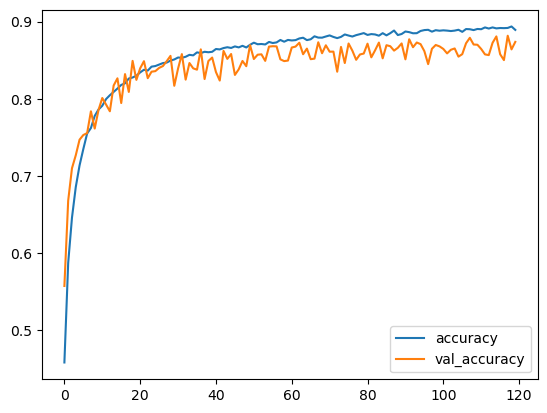

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.plot()

In [ ]:
godin = model
godin.load_weights('godin.weights.h5')
godin.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5933 - accuracy: 0.8816


[0.5932945609092712, 0.881600022315979]